## Introduction
This notebook aims to achieve the following objective:

## Overall goal:
As a marketing analyst, you've been informed by the Chief Marketing Officer that recent marketing campaigns have fallen short of expectations in terms of effectiveness. Your task is to analyze the provided data set to identify the root causes of this issue and recommend data-driven solutions.

## Dataset  
Before starting the analysis, we will load and examine the dataset, followed by some preliminary cleaning.

### Check the dataset information:

In [2]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('Downloads/ifood_df.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2199 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,NaN,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [3]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# null values
df.isnull().sum().sort_values(ascending=False)


Income                  6
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2nCycle       0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpO

The "Income" feature contains 6 missing values.  
We will plot this feature to determine the best imputation strategy.  

Findings:  
- The majority of incomes fall within the $0-$100,000 range, with a few outliers.  
- To minimize the impact of outliers on the imputation, we will fill the missing values using the median income.

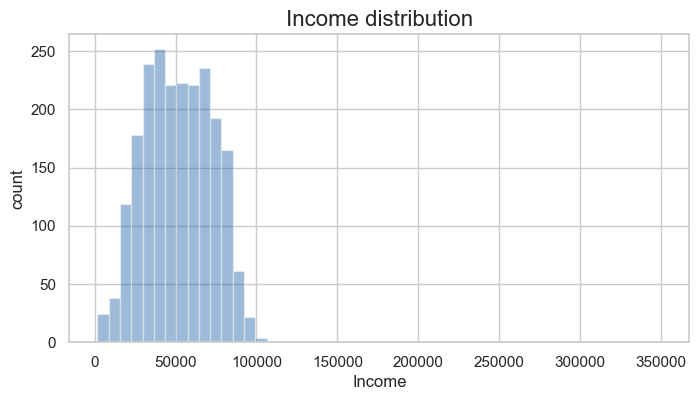

In [4]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');


<Axes: >

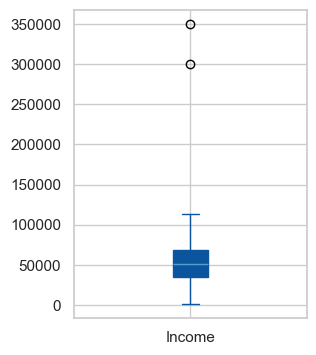

In [5]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [6]:
#Impute the missing values in the "Income" feature using the median value to prevent the mean from being skewed by outliers::
df['Income'] = df['Income'].fillna(df['Income'].median())

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### Outliers  
Identify the features that contain outliers:  

Findings: Several features exhibit outliers (refer to the boxplots below).

In [ ]:

df_to_plot = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_CostContact', 'Z_Revenue', 'Complain']).filter(regex='^(?!marital_|education_)').select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(6,6), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

## Can any useful variables be created from the available data?  
Below is a list of feature names from which we can derive new variables:  
 - The total number of dependents in the household ('Dependents') can be calculated by summing 'Kidhome' and 'Teenhome.'  
 - The total purchases ('TotalPurchases') can be created by adding all features that include the keyword 'Purchases.'

In [10]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']
# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)


In [11]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2nCycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,TotalPurchases
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0,25
1,51315.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2,6
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0,21
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1,8
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1,19


In [12]:
df.isnull().sum().sort_values(ascending=False)

Income                  0
Z_CostContact           0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2nCycle       0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
Dependents              0
Z_Revenue               0
Complain                0
Kidhome                 0
AcceptedCmp2            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5

## Do you notice any patterns or anomalies in the data? Can you visualize them?  
To identify patterns, we will first analyze the correlations between features. In the clustered heatmap below, positive correlations are indicated in red, negative correlations in blue, and no correlation in grey.

From this heatmap, we can observe the following clusters of correlated features:

### The "High Income" cluster:
- Amount spent (e.g., 'TotalMnt' and other 'Mnt' features) and the number of purchases (e.g., 'TotalPurchases' and other 'Num...Purchases' features) show a positive correlation with 'Income.'
- Purchasing methods—whether in-store, online, or via catalog (e.g., 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases')—are also positively correlated with 'Income.'

### The "Have Kids & Teens" cluster:
- Amount spent (e.g., 'TotalMnt' and other 'Mnt' features) and the number of purchases (e.g., 'TotalPurchases' and other 'Num...Purchases' features) exhibit a negative correlation with 'Dependents,' with a stronger effect from kids than from teens.
- Purchasing deals ('NumDealsPurchases') shows a positive correlation with 'Dependents' (kids and/or teens) and a negative correlation with 'Income.'

### The "Advertising Campaigns" cluster:
- Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') is strongly positively correlated with one another.
- There is a weak positive correlation of the advertising campaigns with the "High Income" cluster, and a weak negative correlation with the "Have Kids & Teens" cluster.

### Anomalies:
Interestingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increase in web purchases ('NumWebPurchases'). Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), indicating that promotions may effectively encourage purchases on the website.

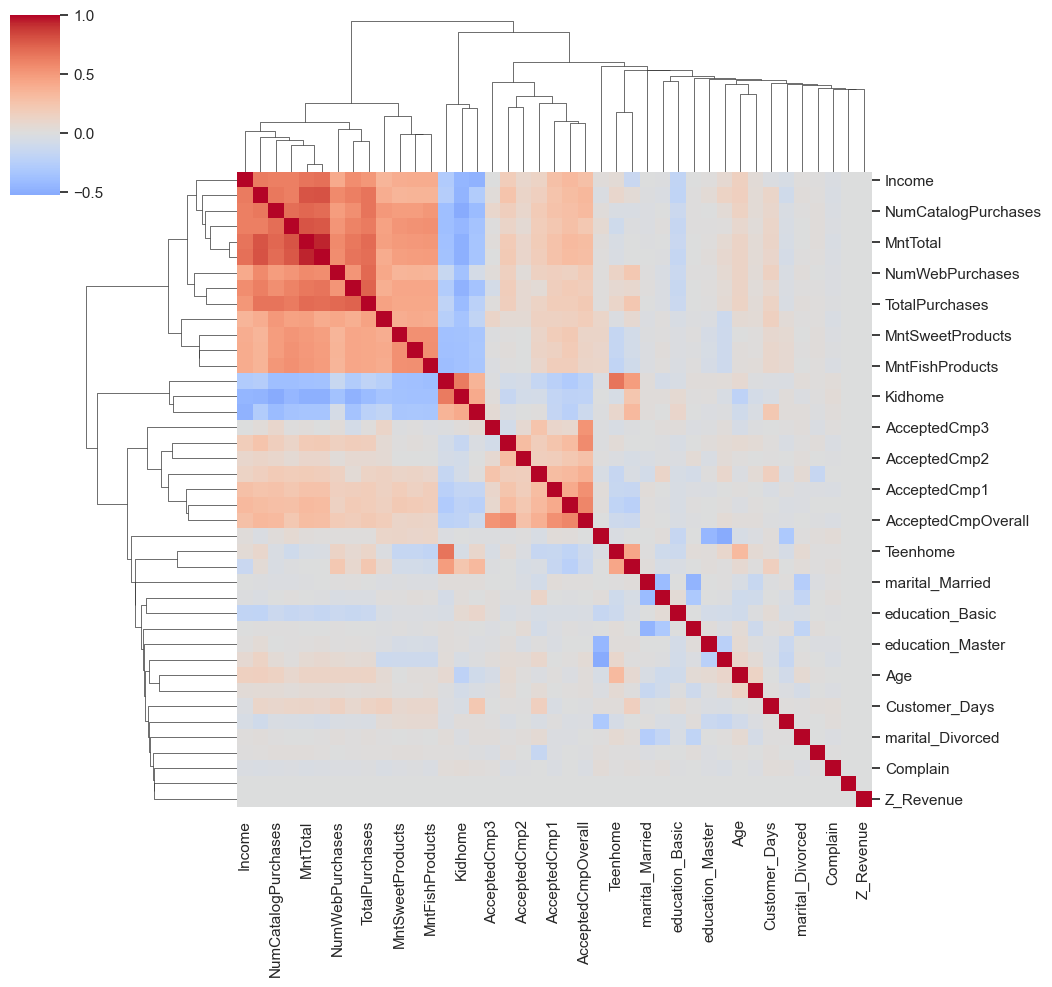

In [17]:
import scipy
# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = df.select_dtypes(include=np.number).corr(method = 'kendall')
#print(corrs.isna().sum().sum())  # Total number of NaN values in the correlation matrix
#print(corrs)  # View the correlation matrix to spot NaN values
corrs_clean = corrs.fillna(0)
# plot clustered heatmap of correlations
sns.clustermap(corrs_clean, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

A plot illustrating the impact of high income on spending will be created, with income limited to less than $200,000 to exclude outliers.

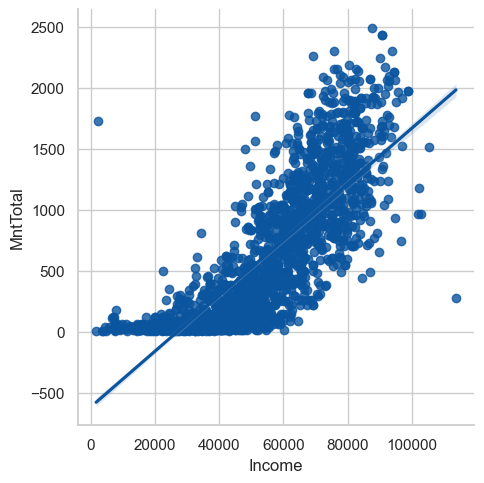

In [19]:
sns.lmplot(x='Income', y='MntTotal', data=df[df['Income'] < 200000]);

A plot will be created to demonstrate the negative impact of having dependents (both kids and teens) on spending.

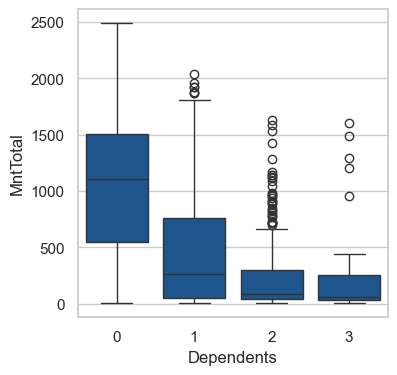

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='MntTotal', data=df);

A plot will be created to illustrate the positive effect of having dependents (both kids and teens) on the number of deals purchased.

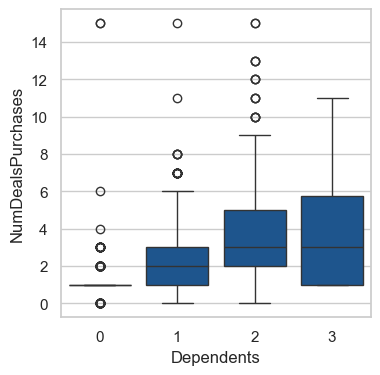

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

Plots will be created to illustrate:  
1. The positive effect of income on advertising campaign acceptance, with income limited to less than $200,000 to exclude outliers.  
2. The negative effect of having kids and teens on advertising campaign acceptance.

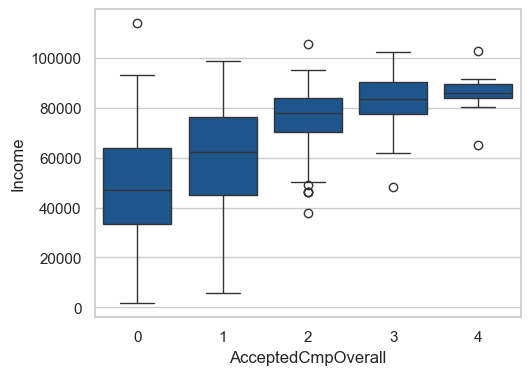

In [22]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='AcceptedCmpOverall', y='Income', data=df[df['Income']<200000]);

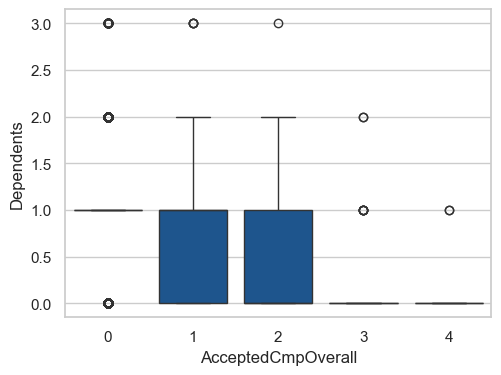

In [23]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='AcceptedCmpOverall', y='Dependents', data=df);

### Investigating the Anomaly:
The number of web visits in the last month shows no positive correlation with the number of web purchases. Instead, it has a positive correlation with the number of deals purchased. This suggests that:

- **Deals as Stimulators**: Promotional deals are likely effective in encouraging purchases on the website, even when the overall number of web visits does not lead to an increase in purchases. 

To further explore this anomaly, we can create plots that highlight:
- The relationship between web visits and web purchases.
- The relationship between web visits and deals purchased.

This will provide deeper insights into how deals may drive consumer behavior independently of the volume of web traffic.

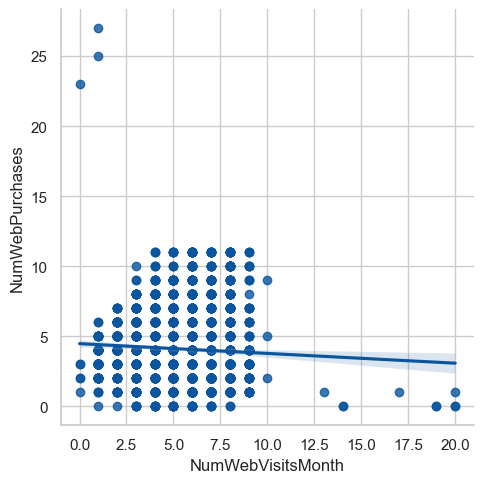

In [24]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

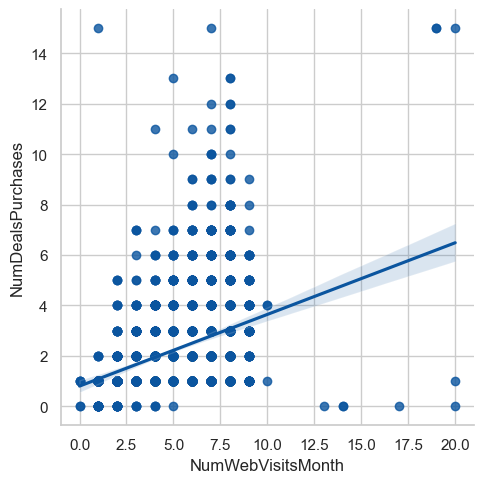

In [25]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);

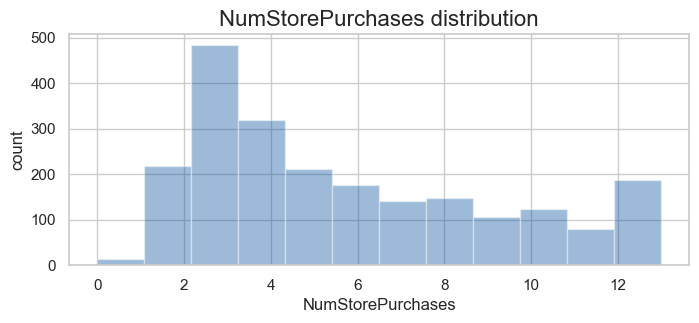

In [26]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

### Which Marketing Campaign is Most Successful?  
To assess the success of the marketing campaigns, we will plot the overall acceptance rates for each campaign.  

### Findings:  
The most successful campaign is the most recent one, indicated by the column name "Response."

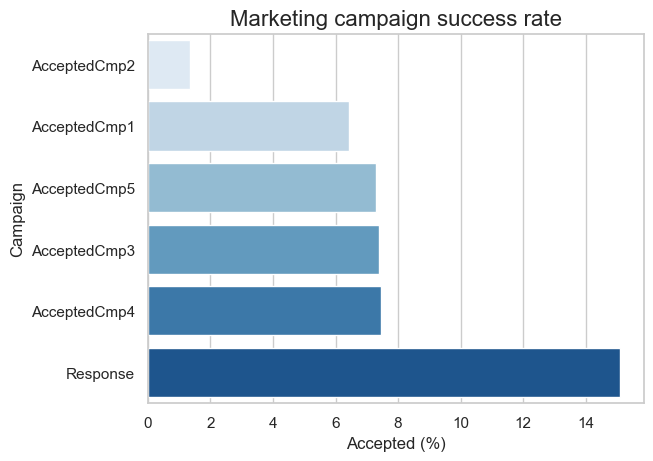

In [34]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

In [41]:
# list of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']
print(binary_cols)
# list of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'AcceptedCmpOverall']

['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmpOverall', 'Response', 'Complain']


In [42]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2nCycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,TotalPurchases
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0,25
1,51315.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2,6
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0,21
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1,8
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1,19


In [44]:
# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
     'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Days'])

demographics

,Average
Income,51863.1
Dependents,0.9
Kidhome,0.4
Teenhome,0.5
Recency,49.0
Customer_Days,2512.7


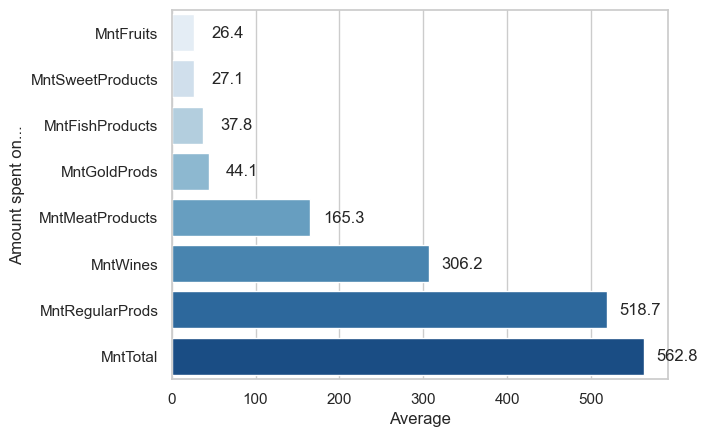

In [45]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

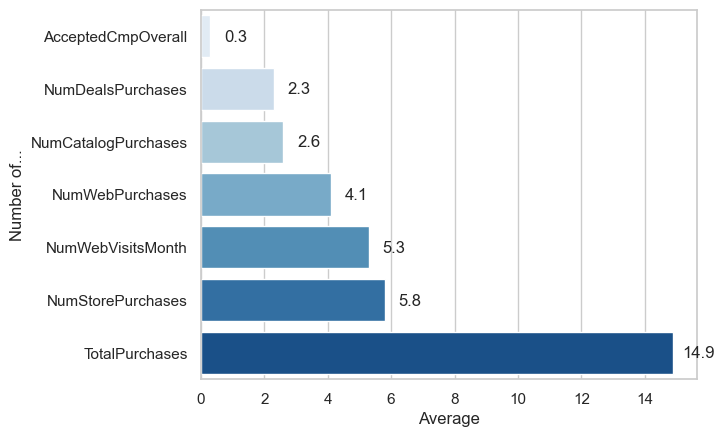

In [46]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

### Conclusion  
Recapping the overall goal:  
As a marketing analyst, you've been informed by the Chief Marketing Officer that recent marketing campaigns have not met expectations. Your task was to analyze the dataset to understand the underlying issues and propose data-driven solutions.

### Summary of Actionable Findings to Improve Advertising Campaign Success:

1. **Advertising Campaign Acceptance**:  
   - Acceptance is positively correlated with income and negatively correlated with having kids/teens.  
   - **Suggested Action**: Develop two targeted advertising campaign streams: one for high-income individuals without kids/teens, and another for lower-income individuals with kids/teens.

2. **Product Success**:  
   - The most successful products are wines and meats, as these categories show the highest average customer spending.  
   - **Suggested Action**: Enhance advertising efforts to promote less popular items, leveraging the success of wines and meats as benchmarks.

3. **Channel Performance**:  
   - Underperforming channels include deals and catalog purchases, with the average customer making fewer purchases through these methods. Conversely, the best-performing channels are web and store purchases, where customers tend to make the most purchases.  
   - **Suggested Action**: Concentrate advertising campaigns on the more successful channels (web and store) to maximize customer reach and engagement.